Social Data Science WS20/21

# Home Assignment 2

### General Instructions

Submit your solution via Moodle until 23.59pm on Tuesday, December 22nd.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of up 3-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please submit only one notebook per team.
Only submit a notebook, do not submit the dataset(s) you used or image files that you have created - these have to be created from your notebook.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, plus some additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that is not matching will not be graded.
* Whenever there is a written task, e.g. task 1d), enter your answer in the specified markdown cell. Do NOT remove the label (e.g. '__A1:__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `pd.read_csv("example_filename.csv")` instead of `pd.read_csv("C:/User/Path/to/your/Homework/example_filename.csv")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points.
  Minimize usage of global variables.
* Ensure your code/notebook terminates in reasonable time.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the dictionary, but keep this dictionary structure)
team_members = [
    {
        'first_name': 'Na Young',
        'last_name': 'Ahn',
        'student_id': 392326
    },
    {
        'first_name': 'Esther',
        'last_name': 'Tala',
        'student_id': 368095
    },
    {
        'first_name': 'Mika',
        'last_name': 'Rosin',
        'student_id': 395049
    },
    {
        'first_name': 'Laurin',
        'last_name': 'Ellenbeck',
        'student_id': 372280
    }
]

In [366]:
# general imports may go here
from typing import List, Optional, Tuple

import numpy as np
import pandas as pd
import statsmodels.api as sm
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Task 1: Basic Data Analysis (20 pts)

Load the data from the file *task1.csv* and investigate the relationship between of the column `x` to the column `y` as well as the relationship between column `x` to the column `z`.
Provide all the code used for your analysis and describe the relationships that you found in the markdown cell below!

,x,y,z
x,1.000000,0.998571,0.006157
y,0.998571,1.000000,0.009444
z,0.006157,0.009444,1.000000


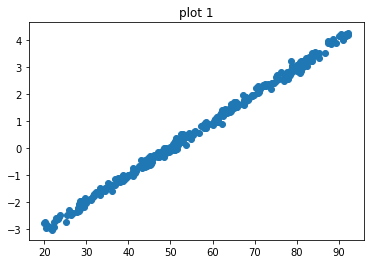

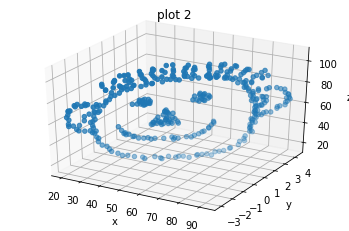

In [389]:
# store the data set in this variable
df_t1 = pd.read_csv("task1.csv")

display(df_t1.corr())

x = df_t1.x
y = df_t1.y
z = df_t1.z

plt.title("plot 1")
display(plt.scatter(x,y))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

plt.title("plot 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
display(ax.scatter3D(x,y,z))

**A1**: To find the relationship between the three variables x,y,z, we first examined the correlation between the variables, as given in the correlation table. We confirmed that there is a high correlation between x and y with the correlation value of 0.99857 and plot 1. Finally we found a smiley face as we plotted all the variables in the 3d scatter plot as given in plot 2.

### Task 2: Propensity Score Matching (30 pts)

In this task we want to apply propensity score matching on the NSW data that has been introduced in the exercise sessions.
Note that throughout the course of this task, we want to perform matching based on the covariates specified by the columns listed in the variable `cov_cols` below.
Recall that the treatment information is specified in the column `treat`, and the dependent variable is `re78`. 
Feel free to look into *NSW.doc* for further information.

In [375]:
# load data
df_nsw = pd.read_csv('NSW.csv', index_col=0)
covariates = ['age', 'black', 'hisp', 'married', 'educ', 'nodegree', 're74', 're75']

display(df_nsw.shape)
display(df_nsw.head())

(18667, 12)

,age,educ,black,married,nodegree,re74,re75,re78,hisp,sample,treat,educ_cat4
1,42,16,0,1,0,0.000000,0.000000,100.485405,0,2,0,4
2,20,13,0,0,0,2366.794189,3317.467773,4793.745117,0,2,0,3
3,37,12,0,1,0,25862.322266,22781.855469,25564.669922,0,2,0,2
4,48,12,0,1,0,21591.121094,20839.355469,20550.744141,0,2,0,2
5,51,12,0,1,0,21395.193359,21575.177734,22783.587891,0,2,0,2


#### a) Automated Propensity Scores (5 pts)

Write a function `add_propensity_scores` that computes the propensity scores based on covariate and treatment columns of an input dataframe and adds them as a column to this input dataframe.
Note that in addition, an `sklearn` classifier can be passed to this function.
Use the function signature specified in the cell below!

In [376]:
from sklearn.linear_model import LogisticRegression

def add_propensity_scores(df: pd.DataFrame, x_cols: List[str], treatment_col: str, propensity_col: str, clf=LogisticRegression()) -> pd.DataFrame:
    """
    :param df: pandas dataframe
    :param x_cols: list of strings that represent the names of the column of df that are used as the covariates in our analysis
    :param treatment_col: name of column in df that represents the treatment variable
    :param propensity_col: string, name of the column of propensity scores that is to be added
    :param clf: sklearn classifier that should be used to produce the propensity scores. You may assume that it contains a fit() and
        predict_proba() function. Defaults to logistic regression classifier with standard parameters
    :return: input dataframe to which a column of the resulting propensity scores has been added
    """
    #step one: filter x_cols out of df
    prop_df = df[x_cols]
    #use clf to estimate prop-score
    clf.fit(prop_df, df[treatment_col])
    predict_score = clf.predict_proba(prop_df)

    df[propensity_col]=predict_score[:,1]
    return df

#### b) Propensity Scores of the NSW Data (5 pts)

Apply your implementation from **a)** to compute the propensity scores on `df_nsw` based on the covariates specified by `covariates`.
Write your resulting scores into a column called `ps`.

In [387]:
df_nsw = add_propensity_scores(df_nsw, covariates, 'treat', 'ps')
display(df_nsw['ps'])

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1        0.002376
2        0.008846
3        0.000010
4        0.000011
5        0.000008
           ...   
18663    0.298960
18664    0.107532
18665    0.105409
18666    0.156148
18667    0.524377
Name: ps, Length: 18667, dtype: float64

#### c) Greedy Matching (10 pts)

Write a function that implements the greedy matching algorithm introduced in lecture.
Note every instance in treatment and control group can be matched at most once.
Further, an optional calliper can be handed to the function as well.
Use the function signature specified in the cell below!

In [378]:
 def greedy_matching(df: pd.DataFrame, propensity_col: str, treatment_col: str, calliper: Optional[float] = None) -> Tuple[List[int], List[int]]:
    """
    :param df: pandas dataframe
    :param propensity_col: string, name of the column in df that contains the propensity scores
    :param treatment_col: string, name of column in df that represents the treatment variable
    :param calliper: float specifying the maximum difference in propensity scores up to which two instances can be
        matched. If not specified, no calliper is used, i.e., no restriction on the difference between propensity scores
        is enforced during matching.
    :return: two lists of integers
        - list of integers that correspond to the indices of the rows in df that are matched into the control group
        - list of integers that correspond to the indices of the rows in df that are matched into the treatment group
    """
    #get groups
    treatment_group = df[df[treatment_col]==1].sort_values(propensity_col)
    control_group = df[df[treatment_col]==0].sort_values(propensity_col)

    output_list=[[],[]]
    for ind_t, pat_t in treatment_group.iterrows():
        df_diff = abs(control_group[propensity_col]-pat_t[propensity_col])
        df_min = df_diff.min()
        ind_c = df_diff[df_diff == df_min].index[0]

        #set output list
        if abs(df_min)<calliper:
            output_list[0].append(ind_t)
            output_list[1].append(ind_c)
            control_group.drop(ind_c)
            
    return output_list

#### d) Average Treatment Effect after Matching (10 pts)

Apply your implementation from c) on the resulting dataframe from b) to compute the average treatment effect on the NSW data after matching by propensity score, using a calliper of $0.2*\sigma(ps)$, i.e., 0.2 times the standard deviation of the propensity scores.
Save the resulting average treatment effect into a variable called `ate`.
Compare it to the average treatment effect that would be obtained without matching, i.e. when considering ALL elements of control and treatment group to compute the corresponding means.
What do you observe? Write your answer into cell **A2**!

In [385]:
pat_index = greedy_matching(df_nsw, 'ps', 'treat', calliper=0.2*df_nsw['ps'].std())
#print(df_nsw.loc[pat_index[0][:5]]['ps'],df_nsw.loc[pat_index[1][:5]]['ps'])
# Add mean with and without greedy matching
ate = np.mean(df_nsw.loc[pat_index[0]]['re78'])
mean_gcg = np.mean(df_nsw.loc[pat_index[1]]['re78'])
mean_cg = np.mean(df_nsw[df_nsw['treat']==0]['re78'])

print(ate)
print(mean_gcg)
print(mean_cg)

6414.364116230949
5226.831934485931
15750.299950189565


**A2:** The treatment groups real earning in 1978 average was significantly higher, compared to the average real earning in 1978 from the matched control group. Overall the average real earnings in 1978 of the treatment group was significantly lower, compared to the overall control group average.

### Task 3: Causal Inference (50 pts)

Suppose you conduct a study to evaluate the effect of a new procedure for coronary bypass surgery that is supposed to help with the postoperative healing process.
Since the new procedure is more risky than the old one, it is rarely performed on patients who are over 80 years old.
However, there is also hardly any data on under 80-year olds that have taken the old treatment.

You can find the data from the study in *bypass.csv*, where _stay_ is the length of the hospital stay after surgery, _age_ is the age of the patient, and _new_ is the binary indicator variable specifying whether the new surgical procedure was used.
Additionally, there is a column _severity_ which quantifies the severity of preoperative diseases.

Perform a regression analysis using the `statsmodels` library to infer whether the new surgery method shortens the length of the postoperative hospital stay.
Save your final model into a variable called `bypass_fit`.

Can you observe a significant effect? Would you generally recommend to apply the new surgery method?
Provide a thorough explanation of the steps in your analysis, your model and your conclusions in cell **A3**!

In [8]:
# load the data
df_bypass = pd.read_csv('bypass.csv')
display(df_bypass.head())

display(df_bypass.corr())

df_bypass_ge_80 = df_bypass[df_bypass.age >=  80]
display(df_bypass_ge_80.corr())

,age,severity,new,stay
0,65.095556,42.630644,1,22.302528
1,53.825666,52.046443,1,22.494925
2,66.458806,62.178975,1,27.901718
3,64.397015,51.594144,1,23.670809
4,85.503686,43.104949,0,31.140778


,age,severity,new,stay
age,1.000000,0.165819,-0.644676,0.748344
severity,0.165819,1.000000,0.035115,0.707914
new,-0.644676,0.035115,1.000000,-0.616616
stay,0.748344,0.707914,-0.616616,1.000000


,age,severity,new,stay
age,1.000000,0.222965,-0.554539,0.635884
severity,0.222965,1.000000,0.210684,0.802713
new,-0.554539,0.210684,1.000000,-0.396230
stay,0.635884,0.802713,-0.396230,1.000000


In [9]:
bypass_fit = sm.OLS(df_bypass.stay, df_bypass[['new','age','severity']]).fit()

display(bypass_fit.summary())

stay_mean_new = np.mean(df_bypass.loc[df_bypass.new == 1, "stay"])
stay_mean_control = np.mean(df_bypass.loc[df_bypass.new == 0, "stay"])
print(f"Mean stay time after surgery with new treatment: {stay_mean_new}")
print(f"Mean stay time after surgery with control treatment: {stay_mean_control}")

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   stay   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.051e+05
Date:                Tue, 22 Dec 2020   Prob (F-statistic):                        0.00
Time:                        13:48:58   Log-Likelihood:                         -42.979
No. Observations:                 200   AIC:                                      91.96
Df Residuals:                     197   BIC:                                      101.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
new           -4.7542      0.054    -88.276      0.000      -4.860      -4.648
age            0.2089      0.001    149.298      0.000       0.206       0.212
severity       0.3032      0.002    139.508      0.000       0.299       0.307
==============================================================================
Omnibus:                        2.920   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.980
Skew:                          -0.273   Prob(JB):                        0.225
Kurtosis:                       2.755   Cond. No.                         220.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mean stay time after surgery with new treatment: 24.660080097356843
Mean stay time after surgery with control treatment: 32.42658761780632


**A3:** 

We observe, on average, a shorter postoperative hospital stay with the new method (24 days) compared to the stay length of the old treatment (32 days).
The correlation between stay and new is negative after all. This correlation is smaller for the older people (>=80 years). Also the correlation between age and severity is higher for older people, meaning they are at a higher risk with a weaker benefit of a shorter stay.

There is a significant effect in general, but not for the older people.

### Task 4: Regression for Prediction (60 pts)

In this task you have to build a linear regression model (i.e., a model of the form $\hat{y} = X\beta$) to predict housing prices.
We are providing you with a training dataset that you have to use to form your model, but we are going to grade your model based on the performance on a test set that is not known to you. 

__What to submit:__ In your submission, you have to provide the following things: 
- Two functions that preprocess the input data into the format that you chose to use in your final regression model.
The first function `preprocess` should perform the main part of the feature engineering and return an unscaled predictor matrix.
The second funtion `scale` should then scale the input data.
Use the function signatures specified in the cells below to implement these functions!
- A corresponding parameter vector $\beta$ that is saved into a variable called `beta_houses`.
It is used to compute the model predictions via $\hat{y} = X\beta$, where $X$ corresponds to the feature matrix obtained after preprocessing and scaling the original input data.
Note that any other models next to linear regression models are not admissible.

__Grading:__ We will measure the performance of your model in terms of the $R^2$ error on a test set that we are holding out.
The function that we use to evaluate your model is illustrated two cells below.
We will create a simple baseline model ourselves, which will be based on a little feature engineering, and a ridge regression model that is just run with default parameters from scikit-learn.
To obtain 50% of the points in this task, your model should show a better performance on the test set than our baseline.
The remaining 50% of the points will be awarded based on your performance against the rest of the class.
The best models will get full marks, and the rest of the marks will degrade along with the testing error scores.  

To obtain decent results, make sure that your model generalizes reasonably well! Further, note that this is a hard regression task, so don't feel discouraged but rather challenged if you do not obtain very high $R^2$ scores during your training.

In [332]:
# Initial loading and splitting of the training data into feature data and target vector

## load the data
df_train = pd.read_csv('housing_train.csv')

## split features and target data from data frame

# dfX_train is to be used as input to preprocess -> do not alter it before passing it to preprocess()! 
dfx_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].to_numpy()

In [333]:
# Display values
display(df_train.head())
print(y_train)

# Check for nan values
print(f"Has NaN vlaue in a column: {dfx_train.isnull().values.any()}")

,Price,Type,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,Condition,Heating,Energy_source,State,Garages,Garagetype
0,219000.0,Mid-terrace house,105.0,1524.0,5.0,1.0,1.0,2.0,1900.0,basic,1900.0,modernized,stove heating,gas,Brandenburg,3.0,Garage
1,185000.0,Corner house,156.0,15000.0,5.0,2.0,2.0,2.0,1870.0,normal,2018.0,modernized,underfloor heating,gas,Niedersachsen,8.0,Outside parking lot
2,999000.0,Duplex,200.0,605.0,7.0,4.0,3.0,3.0,1920.0,normal,2003.0,modernized,night storage heater,gas,Hessen,3.0,Garage
3,465000.0,Mid-terrace house,140.0,680.0,5.0,4.0,3.0,2.0,1989.0,normal,2015.0,renovated,stove heating,gas,Schleswig-Holstein,5.0,Parking lot
4,5950000.0,Villa,467.0,3247.0,7.0,4.0,4.0,3.0,2015.0,luxus,2015.0,dilapidated,oil heating,electric,Hessen,7.0,Garage


[219000. 185000. 999000. ... 196800. 249000. 269000.]
Has NaN vlaue in a column: False


In [319]:
from pandas.api.types import is_numeric_dtype

def preprocess(dfx: pd.DataFrame) -> np.ndarray:
    """
    Preprocessing function
        - should be used for feature engineering

    :param dfx: pandas dataframe consisting of all the predictor colums in the data
    :return: two-dimensional numpy array
    """
    df_preprocess = dfx.copy()
    # Replace each non numerical column with one-hot encoding.
    for column in list(dfx):
        if not is_numeric_dtype(dfx[column]):
            factorized = pd.factorize(dfx[column])
            # room for showning the mapping
            df_preprocess[column] = factorized[0]
    # Convert toa two-dimensional numpy array.
    return df_preprocess.to_numpy()

In [321]:
display(df_train.head())
display(preprocess(df_train))

,Price,Type,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,Condition,Heating,Energy_source,State,Garages,Garagetype
0,219000.0,Mid-terrace house,105.0,1524.0,5.0,1.0,1.0,2.0,1900.0,basic,1900.0,modernized,stove heating,gas,Brandenburg,3.0,Garage
1,185000.0,Corner house,156.0,15000.0,5.0,2.0,2.0,2.0,1870.0,normal,2018.0,modernized,underfloor heating,gas,Niedersachsen,8.0,Outside parking lot
2,999000.0,Duplex,200.0,605.0,7.0,4.0,3.0,3.0,1920.0,normal,2003.0,modernized,night storage heater,gas,Hessen,3.0,Garage
3,465000.0,Mid-terrace house,140.0,680.0,5.0,4.0,3.0,2.0,1989.0,normal,2015.0,renovated,stove heating,gas,Schleswig-Holstein,5.0,Parking lot
4,5950000.0,Villa,467.0,3247.0,7.0,4.0,4.0,3.0,2015.0,luxus,2015.0,dilapidated,oil heating,electric,Hessen,7.0,Garage


array([[2.1900e+05, 0.0000e+00, 1.0500e+02, ..., 0.0000e+00, 3.0000e+00,
        0.0000e+00],
       [1.8500e+05, 1.0000e+00, 1.5600e+02, ..., 1.0000e+00, 8.0000e+00,
        1.0000e+00],
       [9.9900e+05, 2.0000e+00, 2.0000e+02, ..., 2.0000e+00, 3.0000e+00,
        0.0000e+00],
       ...,
       [1.9680e+05, 0.0000e+00, 1.6181e+02, ..., 5.0000e+00, 2.0000e+00,
        0.0000e+00],
       [2.4900e+05, 0.0000e+00, 1.2932e+02, ..., 5.0000e+00, 2.0000e+00,
        0.0000e+00],
       [2.6900e+05, 1.0000e+00, 2.2000e+02, ..., 2.0000e+00, 7.0000e+00,
        2.0000e+00]])

In [322]:
from sklearn.preprocessing import StandardScaler
def scale(x: np.ndarray, x_train: np.ndarray) -> np.ndarray:
    """
    Scaling function
        - should be used to scale input data according to a scaling model that is calibrated on training data
        - Note that the scaling function may also perform other things than scaling, e .g. adding a constant column or
          adding interactions

    :param x: 2D numpy array that is to be scaled
    :param x_train: 2D numpy array of training data that is used to calibrate the scaling
    :return: 2D numpy array
    """    
    s = StandardScaler(with_mean = False)
    s.fit(x_train)
    return s.transform(x)

In [323]:
scale_temp = scale(preprocess(dfx_train), preprocess(dfx_train))
display(scale_temp)

array([[0.        , 0.83350338, 0.32773264, ..., 0.        , 1.03340775,
        0.        ],
       [0.32296153, 1.23834789, 3.22571501, ..., 0.26079493, 2.755754  ,
        0.89361844],
       [0.64592305, 1.58762549, 0.13010384, ..., 0.52158986, 1.03340775,
        0.        ],
       ...,
       [0.        , 1.28446841, 0.32235645, ..., 1.30397465, 0.6889385 ,
        0.        ],
       [0.        , 1.02655864, 0.04817068, ..., 1.30397465, 0.6889385 ,
        0.        ],
       [0.32296153, 1.74638804, 0.55073708, ..., 0.52158986, 2.41128475,
        1.78723689]])

In [324]:
# Function used to evaluate your model, for illustration. Test data will have the same format as the training data.
# Feel free to use it for your own tests  

from sklearn.metrics import r2_score

def eval_model(df_train, df_test, beta):

    # split predictor dataframe from complete data
    dfx_train_ = df_train.iloc[:,1:]
    dfx_test_ = df_test.iloc[:,1:]

    # preprocess training and test data - preprocessed training data is always needed for scaling
    x_train = preprocess(dfx_train_)
    x_test = preprocess(dfx_test_)

    # finally, scale your data into a proper format. Note that for scaling the training data,
    # you should call 'x_train_scaled = scale(x_train, x_train)'
    x_test_scaled = scale(x_test, x_train)

    # apply your vector to predict on the test data
    y_pred = np.dot(x_test_scaled, beta)

    # get target column from test data and compute MSE
    y_test = df_test.iloc[:,0].to_numpy()
    
    return r2_score(y_test,y_pred)

In [325]:
# General featrure check
display(dfx_train.corrwith(df_train.iloc[:,0], axis=0).abs().sort_values(kind="quicksort", ascending=False))

Living_space      0.478651
Bathrooms         0.280130
Floors            0.197549
Bedrooms          0.190110
Rooms             0.189604
Year_built        0.156102
Garages           0.139410
Lot               0.139173
Year_renovated    0.054846
dtype: float64

In [422]:
from sklearn.model_selection import train_test_split

x_train_a, x_test_a = train_test_split(df_train, test_size=0.2)

In [423]:
# Reference from https://machinelearningmastery.com/ridge-regression-with-python/

from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

X = preprocess(x_train_a.iloc[:,1:])
y = x_train_a.iloc[:,0].to_numpy()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=np.linspace(1000, 1200, num=100), cv=cv, scoring='r2')
# fit model
model.fit(X, y)
# summarize chosen configuration
print(f"alpha: {model.alpha_}")
print(f"coef: {model.coef_}")
print(f"score: {model.score(X, y)}")

beta_houses = model.coef_


alpha: 1000.0
coef: [ 1.50403434e+04  3.09556516e+03  1.66896002e+01 -4.28276430e+04
  6.83479128e+02  1.27070354e+04  3.79673005e+04  2.38948014e+03
  1.39549935e+03 -2.54927335e+02  2.57168816e+04 -5.43314291e+03
  4.00397181e+02  6.41747102e+03 -1.47217703e+04  9.94340833e+02]
score: 0.3723107432953042


In [424]:
display(f"R^2 = {eval_model(x_train_a, x_test_a, model.coef_)}")

'R^2 = -0.18698236162910087'